C:\Users\MSn\AppData\Local\Temp\ipykernel_15728\842006617.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='coolwarm')
C:\Users\MSn\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


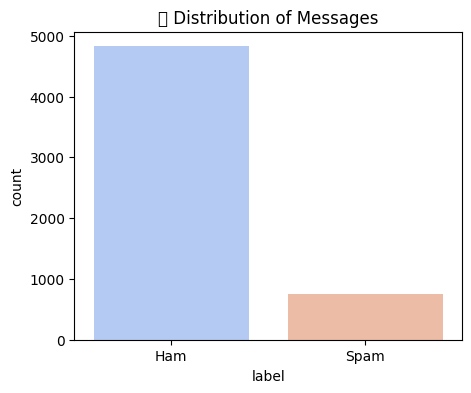

📊 Model Evaluation:
Accuracy: 0.9668161434977578

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



C:\Users\MSn\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


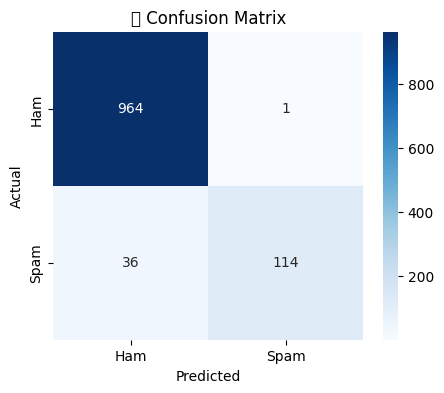

C:\Users\MSn\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


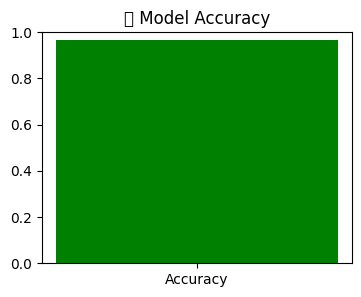


🔍 Test Examples:
1. 'Free prize! Click now!' → 🚨 SPAM!
2. 'Hey, how are you?' → ✅ NOT SPAM.


In [2]:
# Email Spam Detection in VSCode
# Made by: Evaluate Model

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --------------------
# 1. Load dataset
# --------------------
data = pd.read_csv("spam.csv", encoding="latin-1")
data = data[['v1', 'v2']]  # Keep only label & text columns
data.columns = ['label', 'message']

# --------------------
# 2. Preprocessing
# --------------------
data['label'] = data['label'].map({'ham': 0, 'spam': 1})  # Binary labels
data['message'] = data['message'].str.lower().str.strip()  # Normalize text

# --------------------
# 3. Visualize dataset distribution
# --------------------
plt.figure(figsize=(5,4))
sns.countplot(x='label', data=data, palette='coolwarm')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.title("📊 Distribution of Messages")
plt.show()

# --------------------
# 4. Train-test split
# --------------------
X = data['message']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------
# 5. TF-IDF Vectorization
# --------------------
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# --------------------
# 6. Model Training
# --------------------
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# --------------------
# 7. Evaluation
# --------------------
y_pred = model.predict(X_test_tfidf)

print("📊 Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("🧮 Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Accuracy Bar Graph
plt.figure(figsize=(4,3))
plt.bar(["Accuracy"], [accuracy_score(y_test, y_pred)], color='green')
plt.ylim(0,1)
plt.title("✅ Model Accuracy")
plt.show()

# --------------------
# 8. Prediction Function
# --------------------
def predict_spam(email):
    email_tfidf = tfidf.transform([email.lower().strip()])
    prediction = model.predict(email_tfidf)
    return "🚨 SPAM!" if prediction == 1 else "✅ NOT SPAM."

# --------------------
# 9. Example Predictions
# --------------------
print("\n🔍 Test Examples:")
print("1. 'Free prize! Click now!' →", predict_spam("Free prize! Click now!"))
print("2. 'Hey, how are you?' →", predict_spam("Hey, how are you?"))
